In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import Emma image
emma = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

(256,)


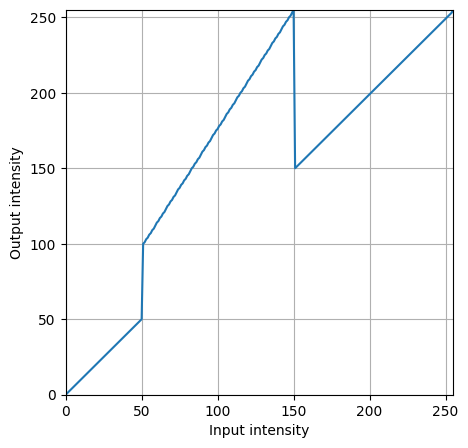

In [34]:
t1 = np.linspace(0, 50, num=51).astype('uint8')
t2 = np.linspace(100, 255, num=100).astype('uint8')
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


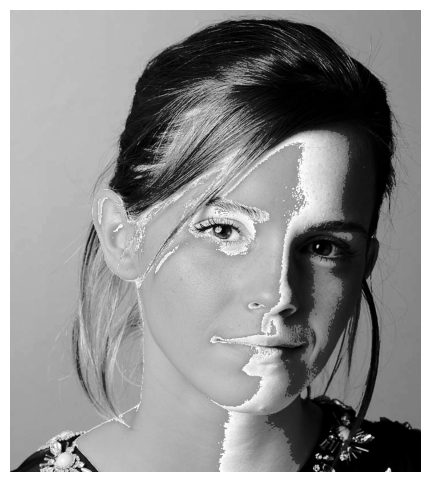

In [35]:
g = t[emma]

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [98]:
# Import Emma image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

(256,)


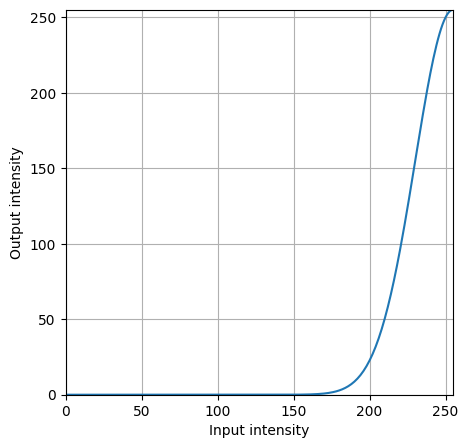

In [99]:
mu = 255
sigma = 25
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

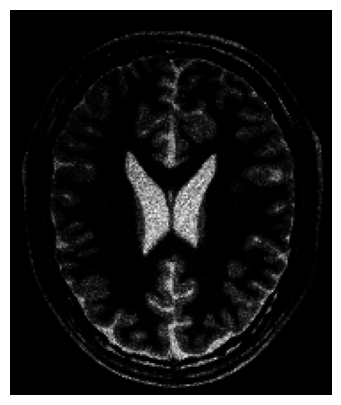

In [100]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

(256,)


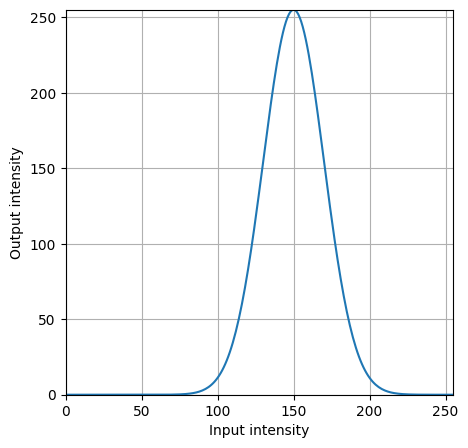

In [101]:
mu = 150
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

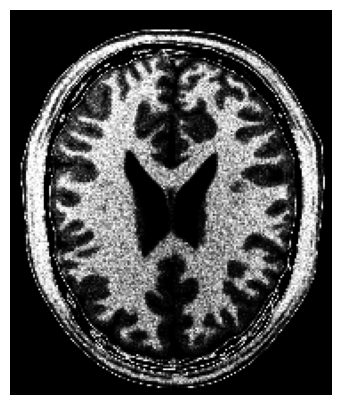

In [102]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [117]:
# Import Emma image
imq3_bgr = cv.imread('a1images/highlights_and_shadows.jpg')
assert imq3_bgr is not None
imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)

In [124]:
L,a,b = cv.split(imq3_lab)

gamma = 0.7
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)


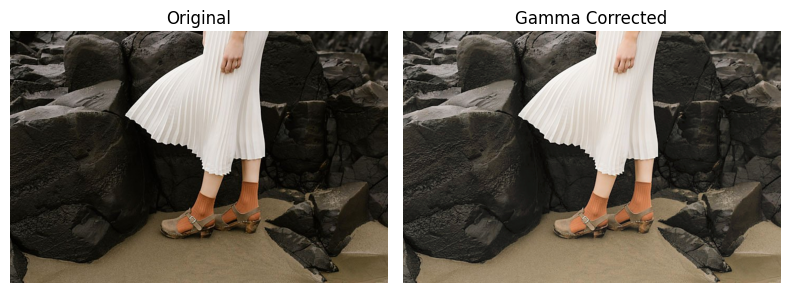

In [125]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first image
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(imq3_modified)
axs[1].set_title('Gamma Corrected')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

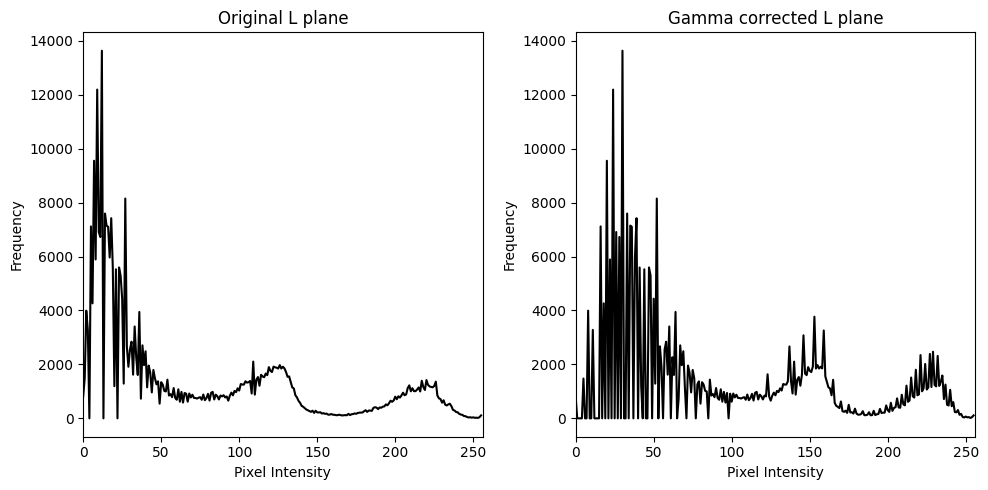

In [129]:
# Compute the histograms for both images
hist1 = cv.calcHist([L], [0], None, [256], [0, 256])
hist2 = cv.calcHist([L_modified], [0], None, [256], [0, 256])

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.plot(hist1, color='black')
plt.title('Original L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.plot(hist2, color='black')
plt.title('Gamma corrected L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

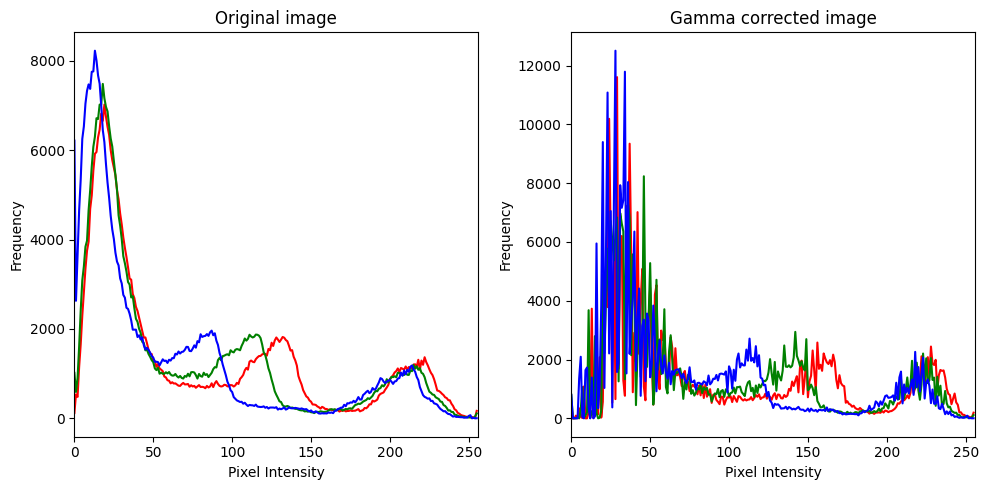

In [132]:
color = ('r', 'g', 'b')  # Color channels

plt.figure(figsize=(10, 5))

# First image's histograms
plt.subplot(1, 2, 1)
for i, col in enumerate(color):
    hist1 = cv.calcHist([imq3_rgb], [i], None, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second image's histograms
plt.subplot(1, 2, 2)
for i, col in enumerate(color):
    hist2 = cv.calcHist([imq3_modified], [i], None, [256], [0, 256])
    plt.plot(hist2, color=col)
plt.title('Gamma corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display
plt.tight_layout()
plt.show()


## Question 4

In [134]:
# Import Emma image
spider = cv.imread('a1images/spider.png')
assert spider is not None
spider_hsv = cv.cvtColor(spider, cv.COLOR_BGR2HSV)
spider_rgb = cv.cvtColor(spider, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(spider_hsv)

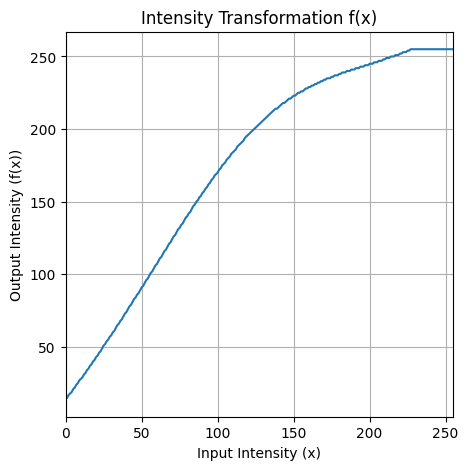

In [172]:
a = 0.6
sigma = 70.0 

x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

# Display the image
plt.figure(figsize=(5, 5))
plt.plot(x, f)
plt.title('Intensity Transformation f(x)')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()

In [173]:
# Apply transformation to Saturation plane
S_modified = cv.LUT(S, f)

# Merge
merged = cv.merge([H, S_modified, V])
spider_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

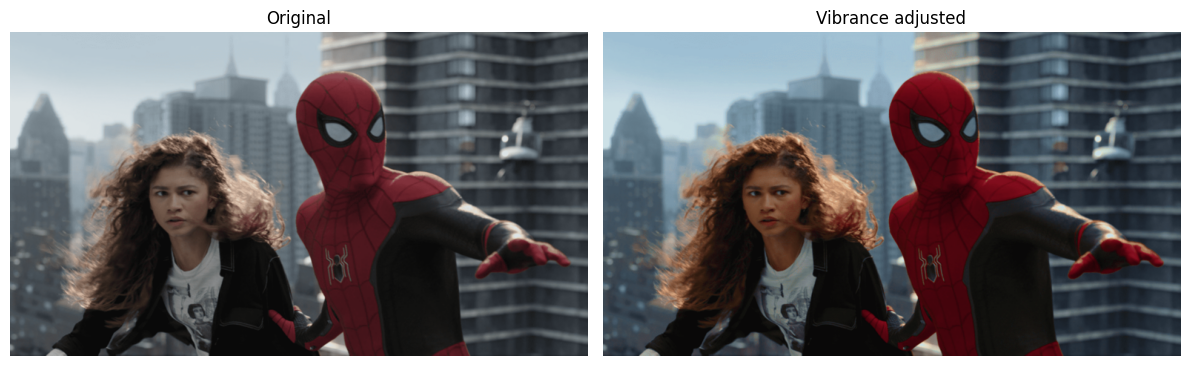

In [175]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(spider_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(spider_modified)
axs[1].set_title('Vibrance adjusted')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

## Question 5

In [187]:
# Import Shells image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None

In [188]:
def histogram_equalization(f):
    # Get image details
    L = 256
    M, N = f.shape

    # Get histogram
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    cdf = hist.cumsum()

    # Define transformation
    t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)]).astype("uint8")

    return t[f]


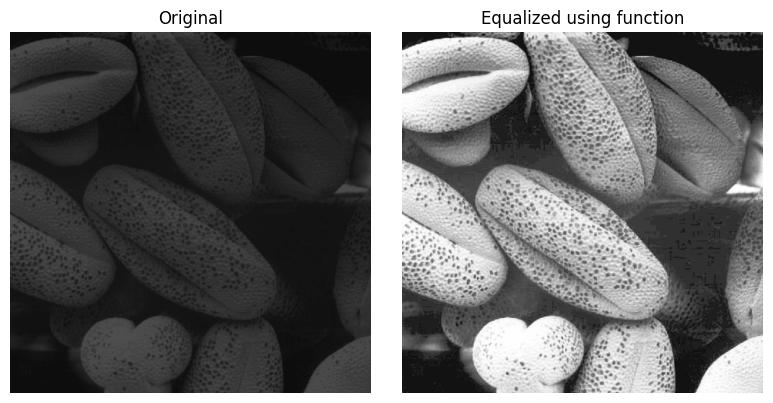

In [189]:
# Do histrogram equalization
equalized = histogram_equalization(shells)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(shells, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized using function')
ax[1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()

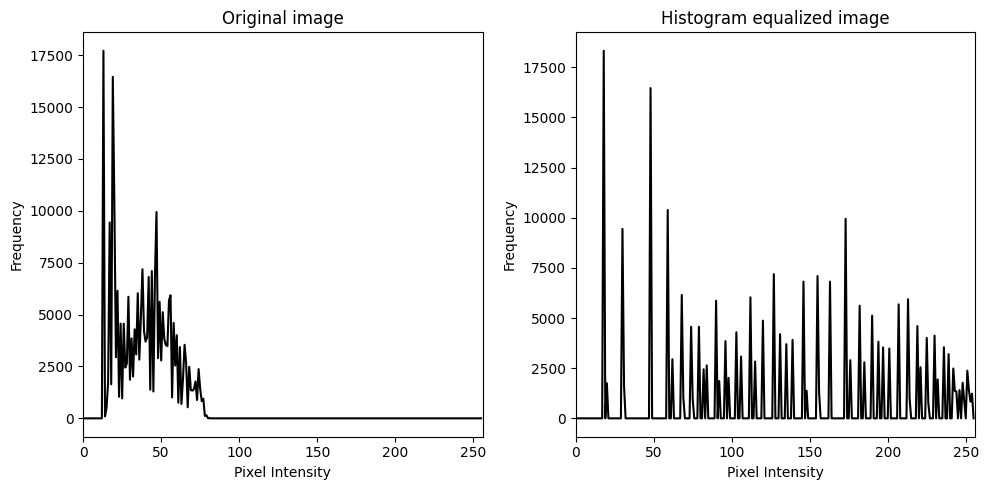

In [191]:
# Compute the histograms for both images
hist1 = cv.calcHist([shells], [0], None, [256], [0, 256])
hist2 = cv.calcHist([equalized], [0], None, [256], [0, 256])

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.plot(hist1, color='black')
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.plot(hist2, color='black')
plt.title('Histogram equalized image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

## Question 6

In [196]:
# Import Jennifer image
jennifer = cv.imread('a1images/jeniffer.jpg')
assert jennifer is not None
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
jennifer_rgb = cv.cvtColor(jennifer, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(jennifer_hsv)

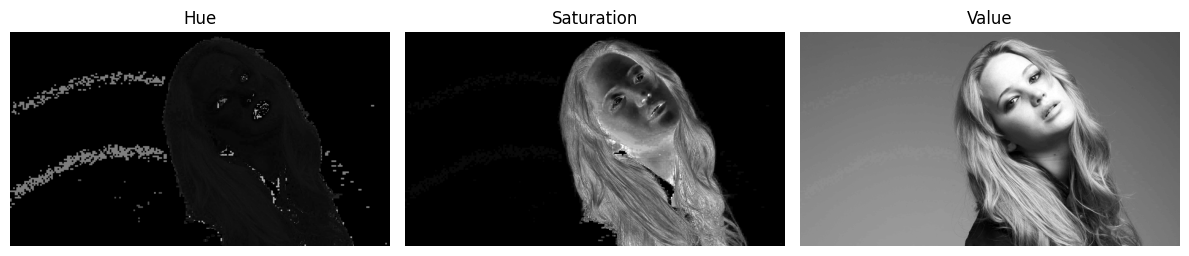

In [198]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

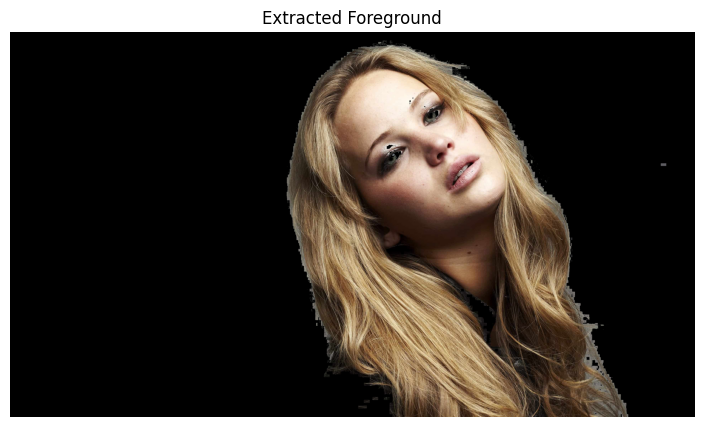

In [205]:
# Apply thresholding on Saturation plane
_, mask = cv.threshold(S, 12, 255, cv.THRESH_BINARY)

# Use bitwise_and to extract the foreground using the mask
foreground = cv.bitwise_and(jennifer, jennifer, mask=mask)

# Display the extracted foreground
plt.figure(figsize=(10, 5))

plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground')
plt.axis('off')
plt.show()

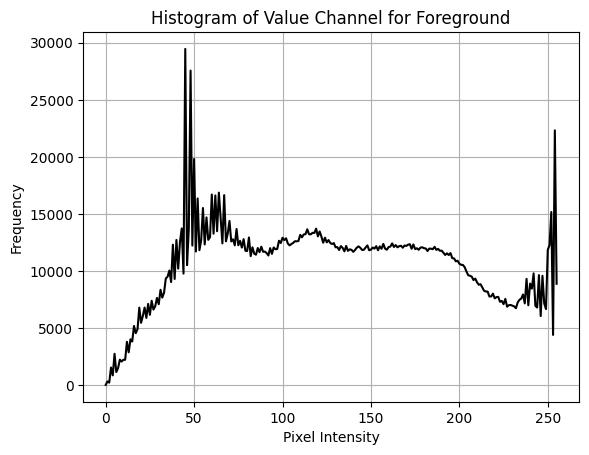

In [206]:
# Compute and plot the histogram of the Value (V) channel of the foreground
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
H_fg, S_fg, V_fg = cv.split(foreground_hsv)

# Calculate the histogram of the Value channel
hist = cv.calcHist([V_fg], [0], mask, [256], [0, 256])

# Plot the histogram
plt.figure()
plt.plot(hist, color='black')
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

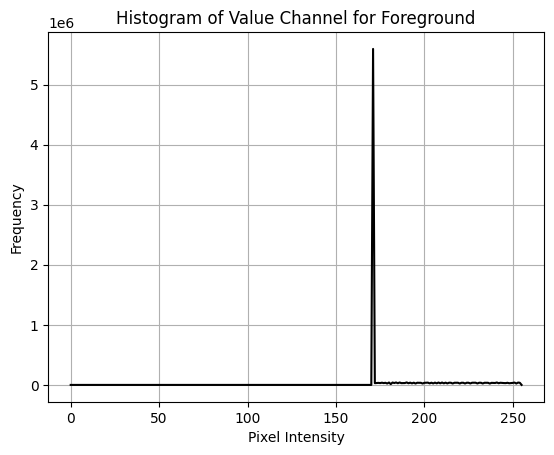

In [208]:
# Do histrogram equalization
V_eq = histogram_equalization(V_fg)

# Calculate the histogram of the Value channel
hist = cv.calcHist([V_eq], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure()
plt.plot(hist, color='black')
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Merge
merged = cv.merge([H_fg, S_fg, V_eq])
jennifer_modified = cv.cvtColor(merged, cv.COLOR_HSV2BGR)
